# Sprint 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
import scipy as sci

In [3]:
games = pd.read_csv('../Data/games.csv')
users = pd.read_csv('../Data/users.csv')
recommendations = pd.read_csv('../Data/recommendations.csv')

In [3]:
games['date_release'] = pd.to_datetime(games['date_release'])

In [4]:
games.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


## Issues to work through:
- Rating definitely needs an update, recommendation from teachers was to keep positive negative and mixed and then create a new column based on num of user reviews
- Recommender system notebook didn't include any information on their genre tags, though they did still include it in their dataset.  Perhaps I will link the tags to the games dataset for now
- Build a couple preliminary recommender models to see if we can get any interesting info
- Idea for the rating system now is to convert the rating into a 1, 0, -1 method right now for positive negative and mixed 

In [5]:
games['rating'].str.contains('Positive').value_counts()

rating
True     36489
False    14383
Name: count, dtype: int64

In [6]:
games['rating'].str.contains('Mixed').value_counts()

rating
False    38715
True     12157
Name: count, dtype: int64

In [7]:
games['rating'].str.contains('Negative').value_counts()

rating
False    48646
True      2226
Name: count, dtype: int64

In [8]:
games['rating'].value_counts()

rating
Positive                   13502
Very Positive              13139
Mixed                      12157
Mostly Positive             8738
Mostly Negative             1849
Overwhelmingly Positive     1110
Negative                     303
Very Negative                 60
Overwhelmingly Negative       14
Name: count, dtype: int64

In [9]:
score_mapping = {
    'Overwhelmingly Positive': 1,
    'Mostly Positive': 1,
    'Very Positive': 1,
    'Positive': 1,
    'Mixed': 0,
    'Negative': -1,
    'Very Negative': -1,
    'Mostly Negative': -1,
    'Overwhelmingly Negative': -1
}

def map_score(value):
    for key, score in score_mapping.items():
        if key.lower() in value.lower():
            return score
    return None  


games['rating'] = games['rating'].apply(map_score)




In [10]:
games['rating'].value_counts()

rating
 1    36489
 0    12157
-1     2226
Name: count, dtype: int64

In [11]:
games.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,1,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,1,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,1,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,0,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,1,88,8784,11.99,11.99,0.0,True


In [12]:
games[['win','mac','linux','steam_deck']] = games[['win','mac','linux','steam_deck']].astype(int)

In [13]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   app_id          50872 non-null  int64         
 1   title           50872 non-null  object        
 2   date_release    50872 non-null  datetime64[ns]
 3   win             50872 non-null  int32         
 4   mac             50872 non-null  int32         
 5   linux           50872 non-null  int32         
 6   rating          50872 non-null  int64         
 7   positive_ratio  50872 non-null  int64         
 8   user_reviews    50872 non-null  int64         
 9   price_final     50872 non-null  float64       
 10  price_original  50872 non-null  float64       
 11  discount        50872 non-null  float64       
 12  steam_deck      50872 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(4), int64(4), object(1)
memory usage: 4.3+ MB


In [14]:
games['discount'].describe()

count    50872.000000
mean         5.592212
std         18.606679
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         90.000000
Name: discount, dtype: float64

Just as a general rule of thumb, discounted games tend to sell better.  Of course this column is capturing the values as they were as of time of data scrape, so for a recommender system it may not be totally necessary.  However, could create some boolean columns from it.

In [15]:
games['is_discounted'] = np.where(games['discount'] > 0, 1,0)

In [16]:
games['is_discounted'].value_counts()

is_discounted
0    45903
1     4969
Name: count, dtype: int64

In [17]:
games.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,is_discounted
0,13500,Prince of Persia: Warrior Within™,2008-11-21,1,0,0,1,84,2199,9.99,9.99,0.0,1,0
1,22364,BRINK: Agents of Change,2011-08-03,1,0,0,1,85,21,2.99,2.99,0.0,1,0
2,113020,Monaco: What's Yours Is Mine,2013-04-24,1,1,1,1,92,3722,14.99,14.99,0.0,1,0
3,226560,Escape Dead Island,2014-11-18,1,0,0,0,61,873,14.99,14.99,0.0,1,0
4,249050,Dungeon of the ENDLESS™,2014-10-27,1,1,0,1,88,8784,11.99,11.99,0.0,1,0


In [18]:
games.columns

Index(['app_id', 'title', 'date_release', 'win', 'mac', 'linux', 'rating',
       'positive_ratio', 'user_reviews', 'price_final', 'price_original',
       'discount', 'steam_deck', 'is_discounted'],
      dtype='object')

In [19]:
hist_plots = games[['date_release', 'rating',
       'positive_ratio', 'user_reviews', 'price_final', 'price_original',
       'discount',  'is_discounted']]

In [20]:
def make_hist(data,col_name):
    plt.figure()
    series = data[col_name]
    high_limit = np.percentile(series,99)
    low_limit = series[np.isfinite(series)].min()
    plt.hist(series,bins=100)
    plt.axvline(series.mean(),color='red')
    plt.axvline(series.median(),color='green')
    try:
        plt.xlim(series.min(),high_limit)
    except ValueError:
        pass
    plt.title(col_name)
    plt.grid()

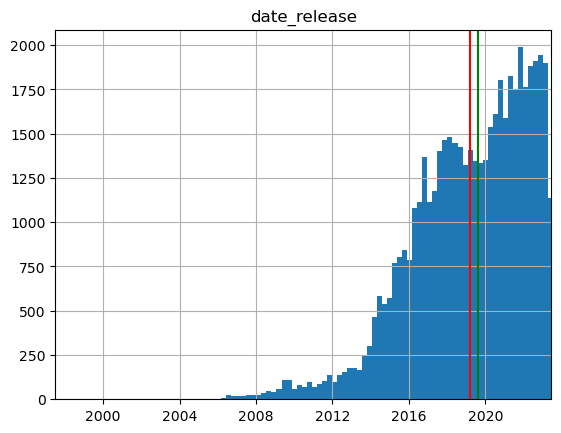

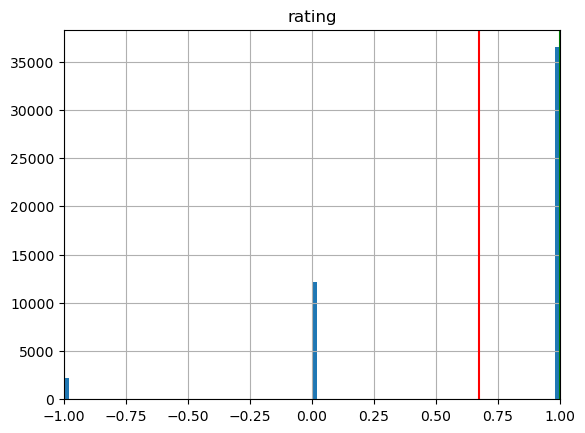

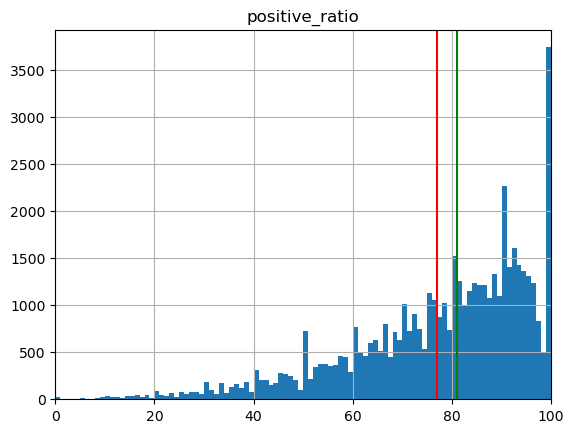

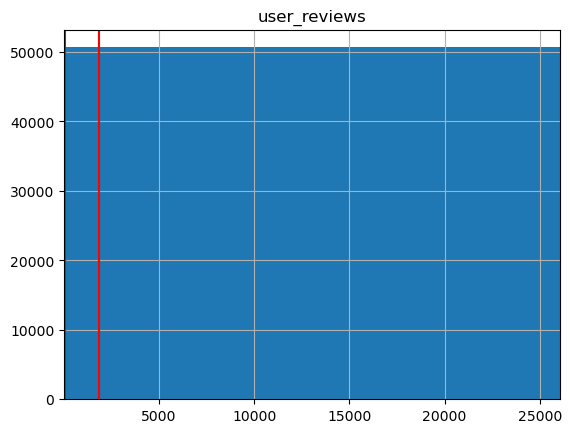

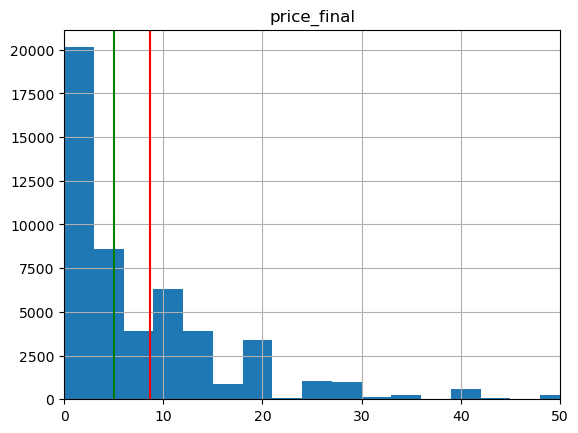

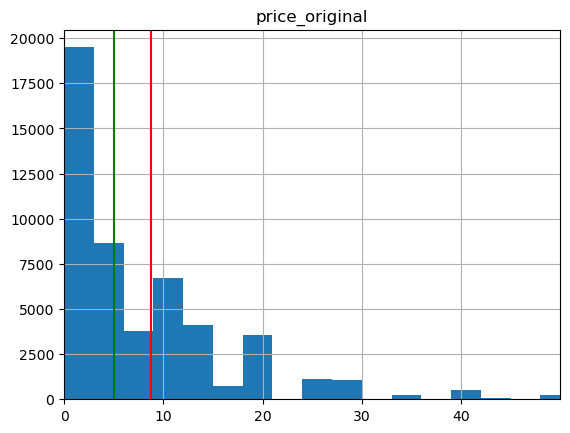

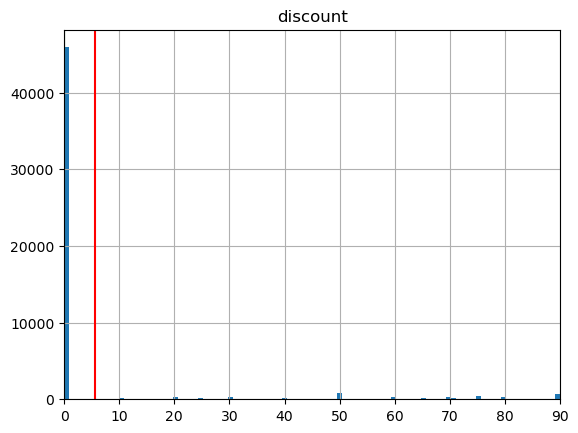

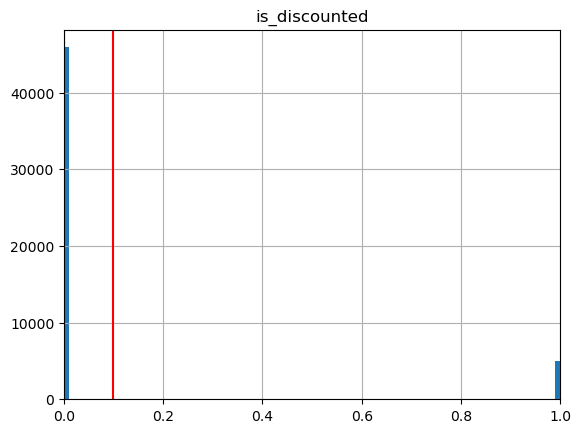

In [21]:
for col in hist_plots.columns:
    make_hist(hist_plots,col)

In [22]:
games['price_final'].describe()

count    50872.000000
mean         8.620325
std         11.514164
min          0.000000
25%          0.990000
50%          4.990000
75%         10.990000
max        299.990000
Name: price_final, dtype: float64

Since I removed the data for overwhelmingly positive/negative etc I should readd it back in in some way.  It categorized those by number of reviews and positivity ratio.  My real question though is whether I should've dummied the ratings column originally or if the approach I took was better. Perhaps I'll start working on some models and then determine that 

In [23]:
import json
df = pd.read_json('../Data/games_metadata.json', lines = True)

In [24]:
df

,app_id,description,tags
0,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,,[Action]
2,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."
...,...,...,...
50867,2296380,,[]
50868,1272080,,[]
50869,1402110,,[]
50870,2272250,Embark on a journey into the darkest nightmare...,"[Early Access, FPS, Action, Retro, First-Perso..."


In [25]:
games = games.merge(df,how='left',left_on='app_id',right_on='app_id')

In [26]:
games

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,is_discounted,description,tags
0,13500,Prince of Persia: Warrior Within™,2008-11-21,1,0,0,1,84,2199,9.99,9.99,0.0,1,0,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,BRINK: Agents of Change,2011-08-03,1,0,0,1,85,21,2.99,2.99,0.0,1,0,,[Action]
2,113020,Monaco: What's Yours Is Mine,2013-04-24,1,1,1,1,92,3722,14.99,14.99,0.0,1,0,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island,2014-11-18,1,0,0,0,61,873,14.99,14.99,0.0,1,0,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the ENDLESS™,2014-10-27,1,1,0,1,88,8784,11.99,11.99,0.0,1,0,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,1,0,0,1,96,101,22.00,0.00,0.0,1,0,,[]
50868,1272080,PAYDAY 3,2023-09-21,1,0,0,-1,38,29458,40.00,0.00,0.0,1,0,,[]
50869,1402110,Eternights,2023-09-11,1,0,0,1,89,1128,30.00,0.00,0.0,1,0,,[]
50870,2272250,Forgive Me Father 2,2023-10-19,1,0,0,1,95,82,17.00,0.00,0.0,1,0,Embark on a journey into the darkest nightmare...,"[Early Access, FPS, Action, Retro, First-Perso..."


## Content Based Recommendation

TF-IDF Vectorizer

In [27]:
overview = games[['title','description']]

In [28]:
overview

,title,description
0,Prince of Persia: Warrior Within™,Enter the dark underworld of Prince of Persia ...
1,BRINK: Agents of Change,
2,Monaco: What's Yours Is Mine,Monaco: What's Yours Is Mine is a single playe...
3,Escape Dead Island,Escape Dead Island is a Survival-Mystery adven...
4,Dungeon of the ENDLESS™,Dungeon of the Endless is a Rogue-Like Dungeon...
...,...,...
50867,I Expect You To Die 3: Cog in the Machine,
50868,PAYDAY 3,
50869,Eternights,
50870,Forgive Me Father 2,Embark on a journey into the darkest nightmare...


In [29]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
import string

stemmer = nltk.stem.PorterStemmer()


stop_words = stopwords.words('english')



def my_tokenizer(sentence):
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()
    
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    
    for word in listofwords:
        if (not word in stop_words) and (word!=''):
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(
                        min_df=2, 
                        tokenizer=my_tokenizer, 
                        ngram_range=(1, 3)) 

TF_IDF_matrix = vectorizer.fit_transform(games['description']) 

C:\Users\matth\Anaconda3new\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [31]:
TF_IDF_matrix.shape

(50872, 129873)

In [32]:
games.loc[games['title'].str.contains('BioShock')]

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,is_discounted,description,tags
10400,214931,BioShock Infinite: Burial at Sea - Episode One,2013-11-12,1,0,1,1,79,1252,14.99,14.99,0.0,1,0,,"[Action, FPS, Story Rich, Singleplayer, Atmosp..."
10976,214932,BioShock Infinite: Burial at Sea - Episode Two,2014-03-25,1,0,1,1,84,1517,14.99,14.99,0.0,1,0,,"[Action, Atmospheric, Story Rich, Stealth, Fem..."
13991,7670,BioShock™,2007-08-21,1,0,0,1,94,22087,0.00,0.00,0.0,1,0,BioShock is a shooter unlike any you've ever p...,"[FPS, Atmospheric, Story Rich, Action, Singlep..."
25126,409710,BioShock™ Remastered,2016-09-15,1,1,0,1,79,36988,4.99,19.99,75.0,1,1,"BioShock is a shooter unlike any other, loaded...","[FPS, Story Rich, Atmospheric, Horror, Singlep..."
25170,244610,BioShock 2: Minerva’s Den,2013-10-02,1,0,0,1,91,383,0.00,0.00,0.0,1,0,,"[Action, FPS, Story Rich, Shooter, Atmospheric..."
26607,214933,BioShock Infinite - Season Pass,2016-09-16,1,0,1,1,89,617,4.99,19.99,75.0,1,1,,"[Action, FPS, Story Rich, Atmospheric, Singlep..."
29037,214930,BioShock Infinite: Clash in the Clouds,2013-07-30,1,0,1,0,60,330,4.99,4.99,0.0,1,0,,"[Action, FPS, Singleplayer]"
31169,409720,BioShock™ 2 Remastered,2016-09-15,1,1,0,0,68,16211,4.99,19.99,75.0,1,1,"In BioShock 2, you step into the boots of the ...","[FPS, Action, Singleplayer, Story Rich, Atmosp..."
46478,525720,BioShock 2: Minerva's Den Remastered,2016-09-16,1,1,0,1,89,515,9.99,9.99,0.0,1,0,,"[Action, RPG, First-Person, Immersive Sim]"
47402,8850,BioShock® 2,2010-02-09,1,0,0,1,88,10022,0.00,0.00,0.0,1,0,Set approximately 10 years after the events of...,"[FPS, Action, Singleplayer, Atmospheric, Story..."


In [33]:
TF_IDF_matrix[(games['title'].str.contains('BioShock')).values].todense().squeeze()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
from sklearn.metrics.pairwise import cosine_similarity

game_1 = TF_IDF_matrix[(games['title'] == 'BioShock™').values,]
game_2 = TF_IDF_matrix[(games['title'] == 'BioShock™ 2 Remastered').values,]

print("Similarity:", cosine_similarity(game_1, game_2)) # Notice the result is a 2D 1X1 array, so to grab
                                                          # the number we will need to index

Similarity: [[0.03753306]]


In [35]:
from sklearn.metrics.pairwise import cosine_similarity

similarities = cosine_similarity(TF_IDF_matrix, dense_output=False)

In [36]:
# rows and columns should be equal
similarities.shape

(50872, 50872)

In [37]:
# Get the column based upon the index
game_index = games[games['title'] == 'BioShock™'].index

# Create a dataframe with the movie titles
sim_df = pd.DataFrame({'game':games['title'],
                       'similarity': np.array(similarities[game_index, :].todense()).squeeze()})

In [38]:
sim_df.sort_values(by='similarity', ascending=False).head(10)

,game,similarity
13991,BioShock™,1.000000
25126,BioShock™ Remastered,0.603515
6384,Terfenstein 3D,0.131551
16089,Brighter Day,0.130474
13343,GRIP: Combat Racing,0.117179
45800,Ice Cream Killer,0.114141
20429,MUD Motocross World Championship,0.112560
10750,The World is Your Weapon,0.109497
27136,Russian Hunter,0.105557
31588,On The Verge II,0.100983


In [39]:
games.columns

Index(['app_id', 'title', 'date_release', 'win', 'mac', 'linux', 'rating',
       'positive_ratio', 'user_reviews', 'price_final', 'price_original',
       'discount', 'steam_deck', 'is_discounted', 'description', 'tags'],
      dtype='object')

In [40]:
def content_recommender(title, games, similarities, vote_threshold=10) :

    # Get the movie by the title
    game_index = games[games['title'] == title].index

    # Create a dataframe with the movie titles
    sim_df = pd.DataFrame(
        {'game': games['title'],
         'similarity': np.array(similarities[game_index, :].todense()).squeeze(),
         'Positive Ratio': games['positive_ratio'],
         'Num of Reviews': games['user_reviews']
        })

    # Get the top 10 movies with > 10 votes
    top_games = sim_df[sim_df['Num of Reviews'] > vote_threshold].sort_values(by='similarity', ascending=False).head(10)

    return top_games

In [41]:
similar_games = content_recommender("Star Wars: Battlefront 2 (Classic 2005)", games, similarities, vote_threshold=1000)
similar_games.head(10)

,game,similarity,Positive Ratio,Num of Reviews
47400,Star Wars: Battlefront 2 (Classic 2005),1.000000,94,42611
47439,LEGO® Star Wars™ III - The Clone Wars™,0.242914,94,5502
47436,LEGO® Star Wars™ - The Complete Saga,0.214063,96,17011
47437,STAR WARS™ Empire at War - Gold Pack,0.152039,97,27174
9053,LEGO® STAR WARS™: The Force Awakens,0.147891,83,3585
25124,Trials on Tatooine,0.147146,79,1325
47438,STAR WARS™: The Force Unleashed™ II,0.113738,63,4720
48300,STAR WARS™ Battlefront (Classic 2004),0.110476,96,3276
47399,STAR WARS™ Jedi Knight II - Jedi Outcast™,0.097342,91,3454
10585,Hextech Mayhem: A League of Legends Story™,0.091707,81,2078


In [42]:
games.loc[games['title'].str.contains('Star Wars')]

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,is_discounted,description,tags
2140,1353943,LEGO® Star Wars™: The Mandalorian Season 2 Cha...,2022-05-04,1,0,0,1,90,63,2.99,2.99,0.0,1,0,,"[Action, Adventure]"
2950,1353945,LEGO® Star Wars™: Solo: A Star Wars Story Char...,2022-04-05,1,0,0,1,77,57,2.99,2.99,0.0,1,0,,"[Action, Adventure]"
6441,836820,Pinball FX3 - Star Wars™ Pinball: The Last Jedi™,2018-04-17,1,0,0,1,91,12,6.99,6.99,0.0,1,0,,[Simulation]
8269,646665,Pinball FX3 - Star Wars™ Pinball: Balance of t...,2017-09-26,1,0,0,1,93,15,9.99,9.99,0.0,1,0,,[Simulation]
8922,2150634,LEGO® Star Wars™: The Skywalker Saga The Clone...,2022-11-01,1,0,0,1,75,24,2.99,2.99,0.0,1,0,,"[Action, Adventure]"
9190,1353944,LEGO® Star Wars™: Rogue One: A Star Wars Story...,2022-04-19,1,0,0,1,73,46,2.99,2.99,0.0,1,0,,"[Action, Adventure]"
10951,1353942,LEGO® Star Wars™: The Mandalorian Season 1 Pack,2022-04-05,1,0,0,1,82,134,2.99,2.99,0.0,1,0,,"[Action, Adventure]"
11756,2150631,LEGO® Star Wars™: The Skywalker Saga Rebels Pack,2022-11-15,1,0,0,0,52,21,2.99,2.99,0.0,1,0,,"[Action, Adventure]"
12235,1353946,LEGO® Star Wars™: The Skywalker Saga Trooper Pack,2022-05-04,1,0,0,1,88,25,2.99,2.99,0.0,1,0,,"[Adventure, Action]"
13185,1414630,LEGO® Star Wars™: The Bad Batch Character Pack,2022-05-04,1,0,0,0,46,43,2.99,2.99,0.0,1,0,,"[Action, Adventure]"


In [43]:
no_desc = games[['title','user_reviews','positive_ratio']][games['description'].str.len() == 0]

no_desc.sort_values(by='user_reviews',ascending=False)

,title,user_reviews,positive_ratio
14398,Counter-Strike: Global Offensive,7494460,88
47770,PUBG: BATTLEGROUNDS,2217226,57
13176,Dota 2,2045628,82
12717,Grand Theft Auto V,1484122,86
14535,Tom Clancy's Rainbow Six® Siege,993312,86
...,...,...,...
11455,ACE COMBAT™ 7: SKIES UNKNOWN - F/A-18F Super H...,10,80
3941,Monster Hunter World: Iceborne - Pendant: Flyi...,10,100
47039,Zombie Army 4: PPSH Submachine Gun Bundle,10,90
25301,World War II Online - STARTER,10,30


In [44]:
games[games['tags'].str.len() == 0]

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,is_discounted,description,tags
33,371970,Barony,2015-06-23,1,1,1,1,92,3713,20.00,0.00,0.0,1,0,,[]
214,2277010,Postmouse Soundtrack,2023-01-30,0,0,0,1,100,27,0.00,0.00,0.0,1,0,,[]
219,1600150,Tiny Bunny: Full Soundtrack,2021-04-23,0,0,0,1,98,97,3.99,3.99,0.0,1,0,,[]
224,222573,Train Simulator: Western Pacific GP20 High Nos...,2016-04-28,1,0,0,1,100,18,19.99,19.99,0.0,1,0,,[]
287,919640,Steel Division 2,2019-06-20,1,0,0,1,79,6343,40.00,0.00,0.0,1,0,,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50866,2362300,Train Sim World® 4,2023-09-26,1,0,0,0,65,351,50.00,0.00,0.0,1,0,,[]
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,1,0,0,1,96,101,22.00,0.00,0.0,1,0,,[]
50868,1272080,PAYDAY 3,2023-09-21,1,0,0,-1,38,29458,40.00,0.00,0.0,1,0,,[]
50869,1402110,Eternights,2023-09-11,1,0,0,1,89,1128,30.00,0.00,0.0,1,0,,[]


Though description based recommendations do at a base level offer interesting insights and usually at least a moderately accurate recommendation this dataset unfortunately is missing descriptions for a lot of titles, many of which are relatively popular and well known games.  Tags are also missing from some games but not nearly as much as descriptions.

## User Based Recommendation

In [45]:
users = pd.read_csv('../Data/users.csv')
recommendations = pd.read_csv('../Data/recommendations.csv')

In [46]:
users.head()

,user_id,products,reviews
0,7360263,359,0
1,14020781,156,1
2,8762579,329,4
3,4820647,176,4
4,5167327,98,2


In [47]:
users['products'].median()

55.0

In [48]:
users['reviews'].mean()

2.8767377246459964

In [49]:
recommendations.head()

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,51580,0
1,304390,4,0,2017-02-17,False,11.5,2586,1
2,1085660,2,0,2019-11-17,True,336.5,253880,2
3,703080,0,0,2022-09-23,True,27.4,259432,3
4,526870,0,0,2021-01-10,True,7.9,23869,4


In [50]:
recommendations['review_id'].nunique()

KeyboardInterrupt: 

In [ ]:
recommendations.shape

In [4]:
recommendations['is_recommended'] = recommendations['is_recommended'].astype(int)

In [ ]:
recommendations.columns

In [ ]:
recommendations['date'] = pd.to_datetime(recommendations['date'])

In [ ]:
hist_plots2 = recommendations[['helpful', 'funny', 'date', 'is_recommended', 'hours']]

In [ ]:
for col in hist_plots2.columns:
    make_hist(hist_plots2,col)

In [ ]:
recommendations[['helpful','funny']].describe()

In [ ]:
recommendations['is_recommended'].value_counts(normalize=True) # 85% of reviews are recommended, meaning players that actually 
# take the time to write a review usually do so when they enjoy a product 

In [ ]:
negative = recommendations[recommendations['is_recommended']==0]

In [ ]:
negative.sort_values(by='hours',ascending=False)

In [ ]:
negative['hours'].median()

In [ ]:
negative['helpful'].mean()

In [ ]:
negative.sort_values(by='funny',ascending=False) 

In [ ]:
games.loc[games['app_id']==275850] #oof, however despite having some seriously popular negative reviews its actually got a 76%
# positive ratio.  

In [ ]:
games.loc[games['app_id']==359550]

In [ ]:
# uh oh, notebook did say that this method wasn't optimal for large datasets and I guess mine qualifies.

# users = recommendations['user_id'].unique()
# users_games = recommendations['app_id'].unique()

# num_users = len(users)
# num_games = len(users_games)

# # np.nan means they user has not reviewed the movie
# R = np.full((num_users, num_games), np.nan)

# #Build the user-item matrix
# zip(recommendations.index, recommendations["user_id"], recommendations["app_id"], recommendations["is_recommended"])

# # for row in recommendations.itertuples(): # same as zip(df.index, df["user"], df["movie"], df["score"])
# #     user = row[7]
# #     game = row[1]
# #     rating = row[5]
# #     R[user-1, game-1] = rating

# R_df = pd.DataFrame(data=R, index=range(1, num_users+1), columns=range(1, num_games+1))

My efforts to try and continue onwards with that particular array have not worked.  However, I did discover this github repository https://github.com/recommenders-team/recommenders

Many of these options appear far too complex for me at this moment but I might be forced to use one for my final recommender.  For now going to continue on with something else to at least get a general idea of my direction

## Matrix Factorization Method

In [4]:
# remember to include a unique conda environment for the final capstone in the Github as this requires a special package install

from surprise import Dataset
from surprise.reader import Reader
from surprise.prediction_algorithms.matrix_factorization import SVD as FunkSVD

In [16]:
new_recommendations = recommendations.sort_values(by=['user_id', 'app_id'])
new_recommendations.head()

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
31599112,8850,8,0,2014-09-08,True,61.5,0,31599112
24437527,49520,35,16,2015-08-12,True,2.1,0,24437527
40342722,63710,4,0,2014-06-16,False,2.0,0,40342722
29862499,202750,7,3,2017-11-21,False,10.5,0,29862499
20008970,214490,10,0,2021-11-27,True,40.5,0,20008970


In [17]:
new_recommendations.drop(columns='review_id',inplace=True)

In [18]:
# original scraper custom did all the user_id's for anonymity, guess he started at 0

new_recommendations.loc[new_recommendations['user_id']==0]

,app_id,helpful,funny,date,is_recommended,hours,user_id
31599112,8850,8,0,2014-09-08,True,61.5,0
24437527,49520,35,16,2015-08-12,True,2.1,0
40342722,63710,4,0,2014-06-16,False,2.0,0
29862499,202750,7,3,2017-11-21,False,10.5,0
20008970,214490,10,0,2021-11-27,True,40.5,0
27192851,221910,9,3,2021-09-26,True,19.6,0
31617242,222880,24,0,2022-02-22,True,162.5,0
39041000,226960,7,0,2014-09-22,False,1.0,0
30478477,235540,28,2,2015-10-17,True,21.9,0
30298065,260230,12,0,2014-06-25,False,5.5,0


In [19]:
new_recommendations.drop(columns=['helpful','funny','date','hours'],inplace=True)

In [10]:
new_recommendations['app_id'].nunique()



37610

In [11]:
new_recommendations['user_id'].nunique()

13781059

## IMPORTANT

The Reader class is used to parse a file containing ratings.

Such a file is assumed to specify only one rating per line, and each line needs to respect the following structure:

user ; item ; rating ; [timestamp]

In [12]:
# tried running the model last night with line_format='item rating user' but it didn't seem to work, going to manually 
# organize columns



new_recommendations.head()

,app_id,is_recommended,user_id
31599112,8850,1,0
24437527,49520,1,0
40342722,63710,0,0
29862499,202750,0,0
20008970,214490,1,0


In [20]:
new_recommendations = new_recommendations[['user_id','app_id','is_recommended']]

In [10]:
# new_recommendations = new_recommendations.sample(frac=0.01)

In [21]:
new_recommendations

,user_id,app_id,is_recommended
31599112,0,8850,True
24437527,0,49520,True
40342722,0,63710,False
29862499,0,202750,False
20008970,0,214490,True
...,...,...,...
5228835,14306059,397540,True
39735230,14306060,1112830,True
23151356,14306061,1407200,True
25486974,14306062,1987080,True


In [22]:
# expects 3 values to unpack, for now I'll follow along just to see what I get but I don't believe this method is suitable 
# for my data.

my_dataset = Dataset.load_from_df(new_recommendations, Reader( rating_scale=(0, 1)))
my_train_dataset = my_dataset.build_full_trainset()

In [38]:
from surprise.model_selection import GridSearchCV

# Define the range of hyperparameters to test
param_grid = {
    'n_factors': [1,3,5,8],  # Example range for n_factors
    'n_epochs': [20,30,40,50,60],   # Example range for n_epochs
    'lr_all': [5e-5, 1e-4, 5e-4],  # Example range for learning rates
    'biased': [False, True]    # To test both biased and unbiased
}

# Initialize a GridSearchCV object
grid_search = GridSearchCV(FunkSVD, param_grid, measures='rmse', cv=3)

# Fit the grid search to the data
grid_search.fit(my_dataset)

# The best combination of parameters
best_params = grid_search.best_params['rmse']

# Best RMSE score
best_score = grid_search.best_score['rmse']


MemoryError: 

In [ ]:
best_score

In [ ]:
best_params

In [23]:
my_algorithm = FunkSVD(n_factors=5,
                       n_epochs=20,
                       lr_all=0.0005,    # Learning rate for each epoch
                       biased=True,  # This forces the algorithm to store all latent information in the matrices
                       verbose=1)

my_algorithm.fit(my_train_dataset)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19


In [24]:
U = my_algorithm.pu
U.shape

(13781059, 5)

In [25]:
G = my_algorithm.qi.T
G.shape

(5, 37610)

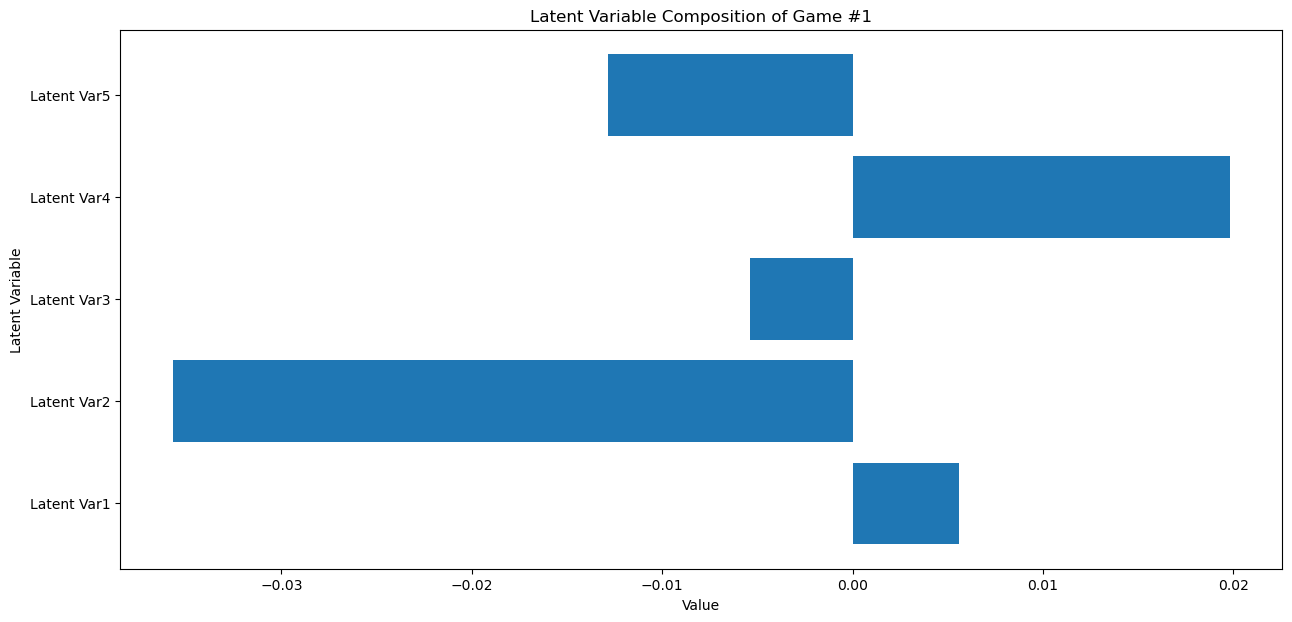

In [26]:
first_game = G[:, 0]

plt.figure(figsize=(15, 7))
plt.barh([f'Latent Var{i}' for i in range(1,len(first_game)+1)], first_game)
plt.title("Latent Variable Composition of Game #1")
plt.ylabel("Latent Variable")
plt.xlabel("Value")
plt.show()

In [27]:
inner_user_id = my_train_dataset.to_inner_uid(0) # find the inner representation of user 0
user_profile = U[inner_user_id]
user_profile

array([-0.17501627, -0.05243138, -0.09441297,  0.05008932, -0.12392991])

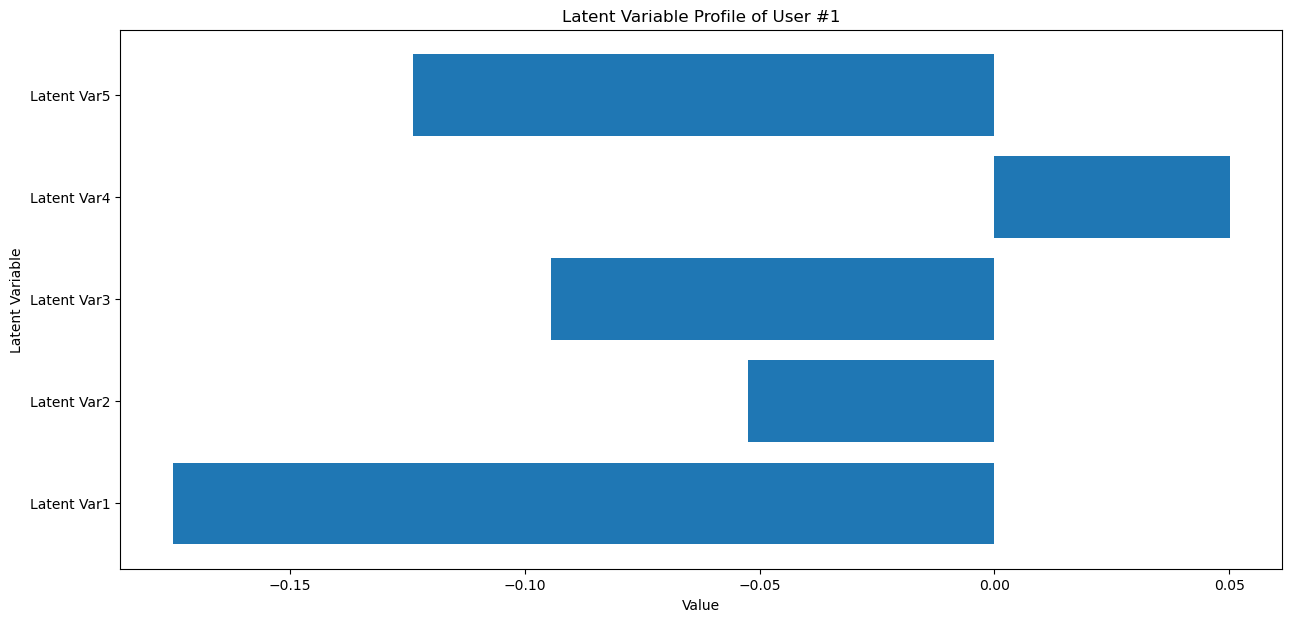

In [28]:
plt.figure(figsize=(15, 7))
plt.barh([f'Latent Var{i}' for i in range(1,len(first_game)+1)], user_profile)
plt.title("Latent Variable Profile of User #1")
plt.ylabel("Latent Variable")
plt.xlabel("Value")
plt.show()

In [29]:
inner_game_id = my_train_dataset.to_inner_iid(49520) # find the inner representation of item 2, note 
# for my ID's they're all longer and unique, harder to represent
game_profile = G[:, inner_game_id]
game_profile

array([-0.00462917, -0.00358923,  0.00141394, -0.00511652, -0.00378233])

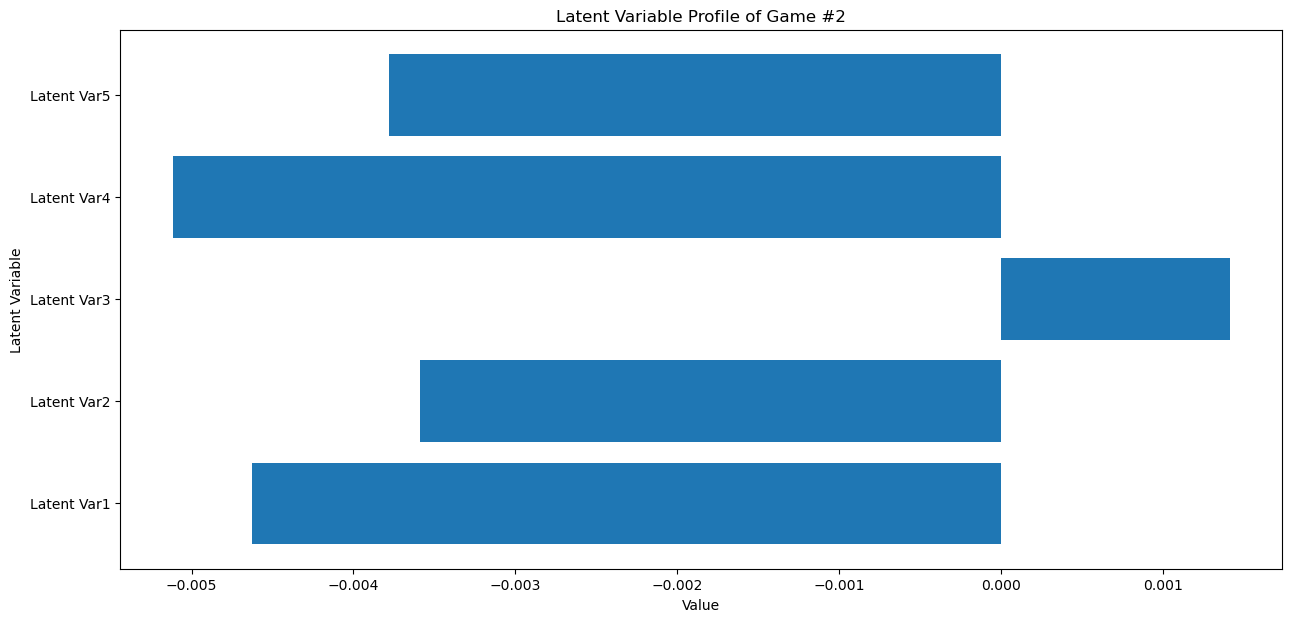

In [30]:
plt.figure(figsize=(15, 7))
plt.barh([f'Latent Var{i}' for i in range(1,len(first_game)+1)], game_profile)
plt.title("Latent Variable Profile of Game #2")
plt.ylabel("Latent Variable")
plt.xlabel("Value")
plt.show()

In [24]:
expected_rating = np.dot(user_profile, game_profile)
expected_rating

1.0144123671382546

In [31]:
from surprise import accuracy
from surprise.model_selection import train_test_split

# The surprise package doesn't allow you to test on the trainset we built
my_train_dataset, my_test_dataset = train_test_split(my_dataset, test_size=0.5)

predictions = my_algorithm.test(my_test_dataset)

In [26]:
# RMSE
RMSE = accuracy.rmse(predictions, verbose=False)
print(RMSE)

0.5692893283237104


In [27]:
# MSE
MSE = accuracy.mse(predictions, verbose=False)
print(MSE)

0.3240903393432613


In [28]:
# MAE
MAE = accuracy.mae(predictions, verbose=False)
print(MAE)

0.46028991117436735


In [29]:
FCP = accuracy.fcp(predictions, verbose=False)
print(FCP)

0.6072650025086151


In [37]:
df_acc = pd.DataFrame(columns=['MSE', 'RMSE','MAE','FCP'])

df_acc.loc["First grid search:  best params_n_factors': 5, 'n_epochs': 20, 'lr_all': 0.0005, 'biased': True '"] = [
    MSE,RMSE,MAE,FCP
    ]

df_acc

,MSE,RMSE,MAE,FCP
"First grid search: best params_n_factors': 5, 'n_epochs': 20, 'lr_all': 0.0005, 'biased': True '",0.102129,0.319577,0.208134,0.600048


This method unfortunately doesn't pair well with my data hence these horrible scores.  It's mainly because the rating system for recommendations is either 0 or 1, whereas FunkSVD appears to enjoy a traditional rating system.  In order to continue on with this style I'd have to infer a different rating system from my recommendations.csv

I have a rating column but its for individual games not what users rate them.  To really infer a proper rating metric I'm going to have to do some data manipulation in the users or recommendations dataframes, but there are two big issues with that.

Firstly, any rating system I infer will be biased.  As a result my model will be biased and not be particularly fantastic.

Secondly, games are as unique as users.  Some users will put a thousand hours into a game then mark it negative because other users find that funny.  Of course you could use the 'funny' column to try and identify those but at that point I'd be building an elaborate model to group every user, read their hours played, their recommendation score, try to infer whether that recommendation score is accurate or not based on helpful and funny awards and then grading them as valid or not.  But that also runs into the issues of different game types.  Does the user who recommends a game they played for 8 hours and got no awards on their recommendation enjoy that particular title more than they enjoy the game they put 10,000 hours into and got a million awards?  I honestly couldn't say, each game is so different that that inference is virtually impossible.

There are models which can take in the information my data has, unfortunately FunkSVD is not one of them.  

After racking my brain and thinking of methods to bin reviews to infer a rating system using methods like np.digitize or normalizing play rate I came to the conclusion that this model cannot be used in the way that I want without introducing a large amount of bias.  

For now this is where my Sprint 2 ends however, I've been doing research into other collaborative filtering models which might yield better results.

In [30]:
games.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


In [31]:
users.head()

,user_id,products,reviews
0,7360263,359,0
1,14020781,156,1
2,8762579,329,4
3,4820647,176,4
4,5167327,98,2


In [32]:
recommendations.head()

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,1,36.3,51580,0
1,304390,4,0,2017-02-17,0,11.5,2586,1
2,1085660,2,0,2019-11-17,1,336.5,253880,2
3,703080,0,0,2022-09-23,1,27.4,259432,3
4,526870,0,0,2021-01-10,1,7.9,23869,4


In [33]:
users['reviews'].unique().sum()

315324

In [34]:
users['user_id'].unique().sum()

102331726433016

In [35]:
users['reviews'].value_counts()

reviews
1       7573027
2       2436378
3       1178593
4        682230
0        525005
         ...   
858           1
1100          1
1347          1
406           1
599           1
Name: count, Length: 681, dtype: int64

In [36]:
# cluster users based on similarities 

# find ratios of helpful and funny

# find ratio of users who have rated vs not.

# Option B, trying to do content based without that 5th of the data

In [37]:
recommendations['funny'].median()

0.0